# Parkinson Disease Analysis

![title](parkinson.jpg)

# Import Libs 

In [82]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Data

In [83]:
# we will start by reading the csv file 
df = pd.read_csv('pd_speech_features.csv')
# we display the first five rows 
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Exploratory Data Analysis and Cleaning 

In [84]:
# print the shape of the used data set 
print("the shape of twitter data set is : ", df.shape)

the shape of twitter data set is :  (756, 755)


In [85]:
# print the columns name 
print("The columns of the folowing data set are : ", "\n", df.columns)

The columns of the folowing data set are :  
 Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [86]:
# check for empty cells 
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [87]:
# we will check for duplicates 
df.drop_duplicates(inplace= True)
df.shape

(755, 755)

In [88]:
# display a general view of the dataframe columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


<Axes: >

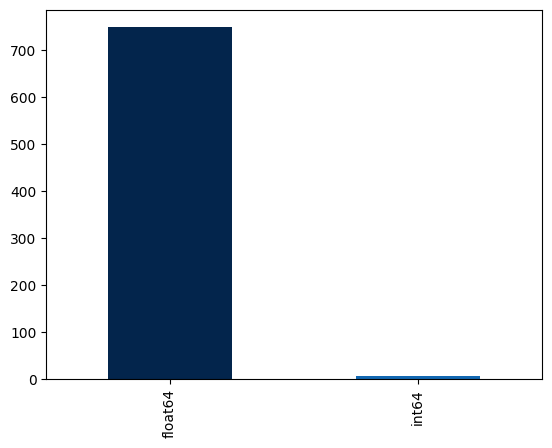

In [89]:
# visualize the total values using a bar plot
df.dtypes.value_counts().plot.bar(color =['#03254c','#1167b1'])

In [90]:
#some statistics calculation 
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,...,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,125.617219,0.516556,0.746225,0.700567,0.488854,323.976159,322.682119,0.006360,0.000383,0.002325,...,26.267260,22.865258,18.608580,13.885309,12.229445,12.386897,14.814613,14.766103,31.509470,0.745695
std,72.770545,0.500057,0.169398,0.069637,0.137420,99.284774,99.468346,0.001828,0.000728,0.002630,...,42.240613,32.640892,25.548051,20.055984,17.793089,16.349404,15.727231,14.437002,34.244795,0.435758
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,63.000000,0.000000,0.762765,0.647335,0.386325,251.000000,250.000000,0.005001,0.000049,0.000970,...,2.404450,3.451300,3.357100,3.076700,2.936950,3.114350,3.671450,3.737650,3.943200,0.000000
50%,126.000000,1.000000,0.809730,0.700690,0.484100,317.000000,316.000000,0.006057,0.000076,0.001490,...,5.593700,7.086800,6.080500,4.797100,4.303600,4.745600,6.736100,7.353900,10.687200,1.000000
75%,188.500000,1.000000,0.834400,0.754990,0.585545,384.500000,383.500000,0.007528,0.000172,0.002520,...,29.045650,29.865000,22.015100,13.193000,10.914100,12.218250,21.959000,22.527250,61.144550,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [91]:
 # we will select some columns to work with 
data = df[['gender', 'DFA','RPDE','numPulses', 'numPeriodsPulses','meanPeriodPulses','class' ]]

In [92]:
data.head()

,gender,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,class
0,1,0.71826,0.57227,240,239,0.008064,1
1,1,0.69481,0.53966,234,233,0.008258,1
2,1,0.67604,0.58982,232,231,0.008340,1
3,0,0.79672,0.59257,178,177,0.010858,1
4,0,0.79782,0.53028,236,235,0.008162,1


In [93]:
data.shape

(755, 7)

In [95]:
data['class'].value_counts()

class
1    563
0    192
Name: count, dtype: int64

In [96]:
not_parkinson = data[data['class'] == 0]
parkinson = data[data['class'] == 1]

In [97]:
not_parkinson.head()

,gender,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,class
33,1,0.66846,0.26212,375,374,0.005139,0
34,1,0.64898,0.33526,292,291,0.006608,0
35,1,0.67496,0.46658,285,283,0.006773,0
42,0,0.79945,0.37209,402,401,0.004809,0
43,0,0.79509,0.36585,397,396,0.004861,0


In [98]:
parkinson.head()

,gender,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,class
0,1,0.71826,0.57227,240,239,0.008064,1
1,1,0.69481,0.53966,234,233,0.008258,1
2,1,0.67604,0.58982,232,231,0.008340,1
3,0,0.79672,0.59257,178,177,0.010858,1
4,0,0.79782,0.53028,236,235,0.008162,1


In [99]:
# we will select the same number of observations as the not_parkinson
size = len(not_parkinson)
parkinson = parkinson[:size]

In [100]:
len(parkinson)

192

In [23]:
new_data = pd.concat([parkinson,not_parkinson])
new_data.shape
# we get a balanced data set

(384, 7)

In [24]:
new_data.tail()

,gender,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,class
751,0,0.56355,0.28385,417,416,0.004627,0
752,0,0.56499,0.59194,415,413,0.004550,0
753,0,0.72335,0.46815,381,380,0.005069,0
754,0,0.74890,0.49823,340,339,0.005679,0
755,0,0.76471,0.46374,340,339,0.005676,0


In [25]:
new_data['class'].value_counts()

class
1    192
0    192
Name: count, dtype: int64

Text(0.5, 1.0, 'Parkinson VS Not_Parkinson')

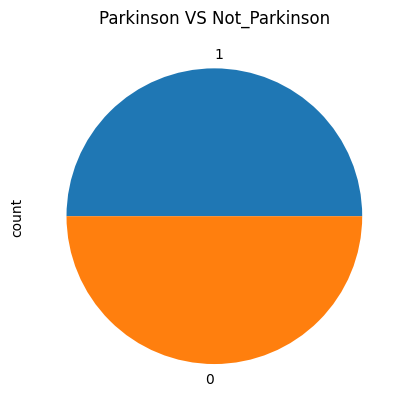

In [26]:
new_data['class'].value_counts().plot.pie()
plt.title("Parkinson VS Not_Parkinson")

# Model Classification 

In [27]:
y = new_data['class']

In [37]:
x = new_data[['gender', 'DFA','RPDE','numPulses', 'numPeriodsPulses','meanPeriodPulses']]

In [52]:
y.shape

(384,)

In [38]:
x.shape

(384, 6)

In [55]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# LogisticRegression Model

In [71]:
# Model Creation 
model = LogisticRegression(max_iter=2000)

In [72]:
# Model training 
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [73]:
# Model testing
y_pred = model.predict(x_test)

In [75]:
# calculate the accuracy
achieved_score = accuracy_score(y_test, y_pred) 
print ("The model's score is  : ", round(achieved_score*100,2),"%")

The model's score is  :  66.23 %


# RandomForestClassifier Model

In [77]:
# model creation
model_2 = RandomForestClassifier()

In [78]:
# model training
model_2.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
# model testing
y_pred = model_2.predict(x_test)

In [81]:
# calculate accuracy
achieved_score = accuracy_score(y_test, y_pred) 
print ("The model's score is  : ", round(achieved_score*100,2),"%")

The model's score is  :  79.22 %


Happy learning !!!!!